# Week 2
# G2M insight for Cab Investment firm

***
Author - Vipul Pawar
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Forming data frames

In [2]:
df_cab = pd.read_csv('./Datasets/Cab_Data.csv')
df_customer = pd.read_csv('./DataSets/Customer_ID.csv')
df_city = pd.read_csv('./DataSets/City.csv')
df_transaction = pd.read_csv('./DataSets/Transaction_ID.csv')

In [3]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Changing date format from Int to DD-MM-YYYY object

In [4]:
df_cab['Date of Travel'] = df_cab['Date of Travel'].apply(lambda x: datetime.fromordinal(datetime(1900, 1, 30).toordinal() + x - 2).strftime("%d-%m-%Y"))


In [5]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,06-02-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,04-02-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,31-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,05-02-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,01-02-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [7]:
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### So far there is no NA values in all 4 data frames. Joining data frames one by one.

In [13]:
df_transaction.shape, df_customer.shape, df_cab.shape, df_city.shape

((440098, 3), (49171, 4), (359392, 7), (20, 3))

#### Joining df_customer to df_transaction using Customer ID as a key

In [14]:
df_transaction_customer = df_transaction.join(df_customer.set_index('Customer ID'), on=df_transaction['Customer ID'])
df_transaction_customer.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536


#### Joining df_transation_customer to df_cab using key Transaction ID

In [15]:
df_cab_trans_cust=df_cab.join(df_transaction_customer.set_index('Transaction ID'), on=df_cab['Transaction ID'] )
df_cab_trans_cust.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,06-02-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,04-02-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,31-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,05-02-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,01-02-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


#### Joining df_city to df_can_trans_cust using City as a key to create a final data frame df

In [16]:
df = df_cab_trans_cust.join(df_city.set_index('City'), on=df_cab_trans_cust['City'])
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-06-02,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-04-02,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-05-02,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


#### Checking for na values and null values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

#### Checking for Duplicates in data. This is highly unlikely because every transaction ID is a unique number. Different transaction ID can have same customer ID.

In [18]:
print('Number of duplicates: ', np.sum(df.duplicated()))

Number of duplicates:  0


In [19]:
cols = df.columns.tolist()
print(cols)
cols_rearranged = ['Transaction ID', 'Customer ID', 'Date of Travel', 'Company', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'City', 'Population', 'Users']
print('\nRearranged columns: ', cols_rearranged)

df = df[cols_rearranged]

['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users']

Rearranged columns:  ['Transaction ID', 'Customer ID', 'Date of Travel', 'Company', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'City', 'Population', 'Users']


In [20]:
df

,Transaction ID,Customer ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),City,Population,Users
0,10000011,29290,2016-06-02,Pink Cab,30.45,370.95,313.6350,Card,Male,28,10813,ATLANTA GA,"814,885","24,701"
1,10000012,27703,2016-04-02,Pink Cab,28.62,358.52,334.8540,Card,Male,27,9237,ATLANTA GA,"814,885","24,701"
2,10000013,28712,2016-01-31,Pink Cab,9.04,125.20,97.6320,Cash,Male,53,11242,ATLANTA GA,"814,885","24,701"
3,10000014,28020,2016-05-02,Pink Cab,33.17,377.40,351.6020,Cash,Male,23,23327,ATLANTA GA,"814,885","24,701"
4,10000015,27182,2016-01-02,Pink Cab,8.73,114.62,97.7760,Card,Male,33,8536,ATLANTA GA,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,2018-06-02,Yellow Cab,4.80,69.24,63.3600,Cash,Male,24,15651,WASHINGTON DC,"418,859","127,001"
359388,10440104,53286,2018-02-02,Yellow Cab,8.40,113.75,106.8480,Cash,Male,32,6528,WASHINGTON DC,"418,859","127,001"
359389,10440105,52265,2018-03-02,Yellow Cab,27.75,437.07,349.6500,Cash,Male,56,7966,WASHINGTON DC,"418,859","127,001"
359390,10440106,52175,2018-03-02,Yellow Cab,8.80,146.19,114.0480,Card,Male,32,6423,WASHINGTON DC,"418,859","127,001"


## Data Visualisation

Let's split df to separate cab company data for simplicity. There are only 2 companies Pink Cab and Yellow Cab

In [21]:
df_pink = df[df['Company']=='Pink Cab']
df_yellow = df[df['Company']=='Yellow Cab']

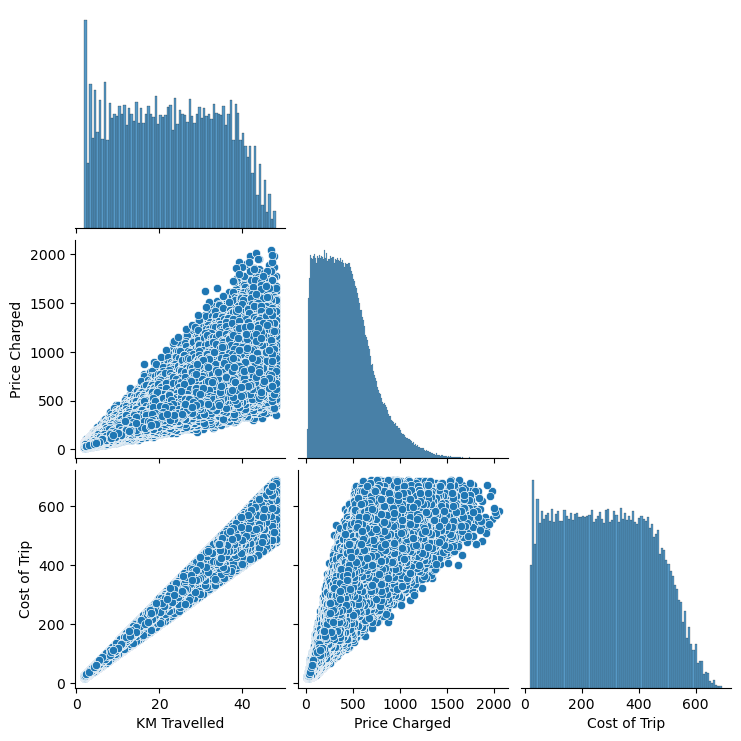

In [22]:
sns.pairplot(data=df[['KM Travelled', 'Price Charged', 'Cost of Trip']],corner=True)
plt.show()

#### As expected, cost of trip strongly goes up as distance travelled but priced charged goes up but not as strongly.

### 1. Total transactions of each cab companies

<AxesSubplot:xlabel='Company'>

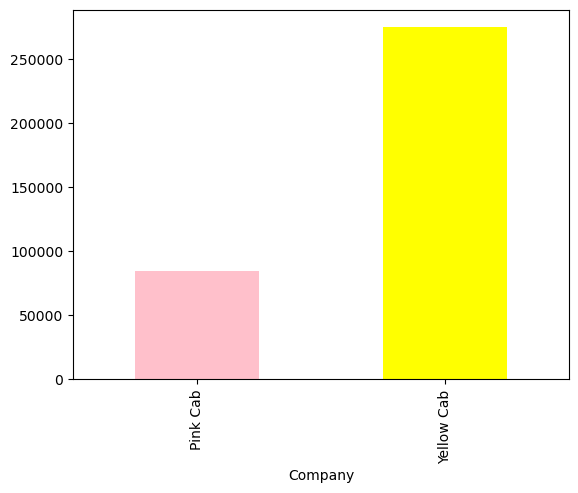

In [23]:
df.groupby(['Company']).size().plot(kind='bar', color=['pink', 'yellow'])

From this plot, we can see that Yellow cab company has more total transactions than Pink cab company. This plot is important because it show class imbalance.

### 2. Prices difference

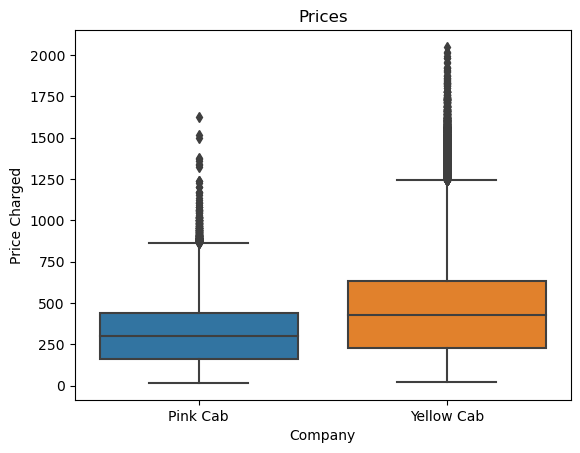

In [24]:
sns.boxplot(x=df['Company'], y=df['Price Charged'])
plt.title('Prices')
plt.show()

Plot shows that Yellow company charges higher rates than Pink company, but it feels this plots lack additional information. For an extreme case example, what if all yellow Cab transactions happened for long distances? or vice versa or both! But all together an interesting plot, it provides new direction of thinking!

### 3. Payment modes

Text(0.5, 1.0, 'Payment Mode')

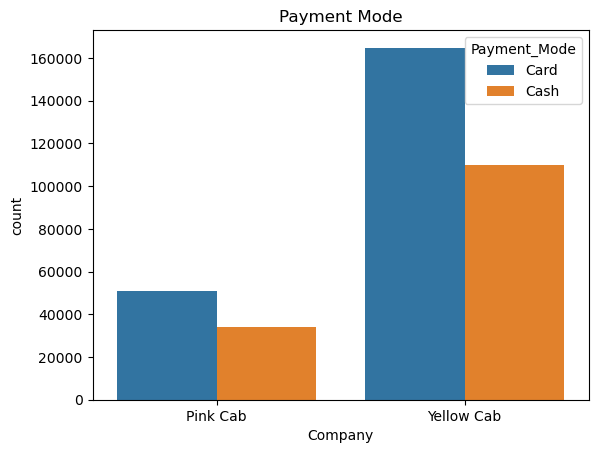

In [25]:
sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode')

More transactions happended via card payment.

### 4. Users in different cities

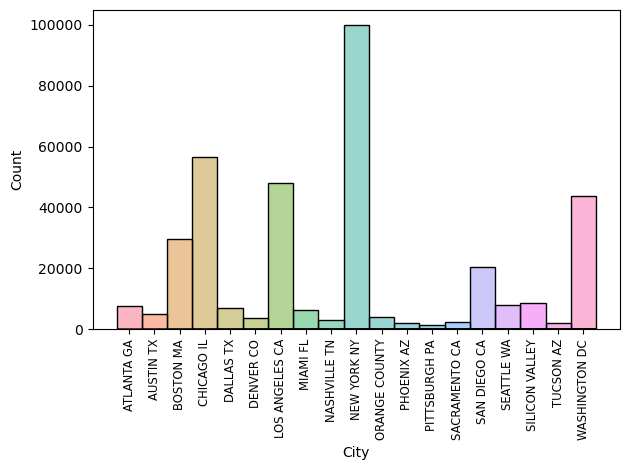

In [26]:
sns.histplot(data=df, x='City', hue='Users', legend=False)
plt.xticks(rotation=90,fontsize='small')
plt.tight_layout()
plt.show()

#### Overall Newyork has highest number of people using cab

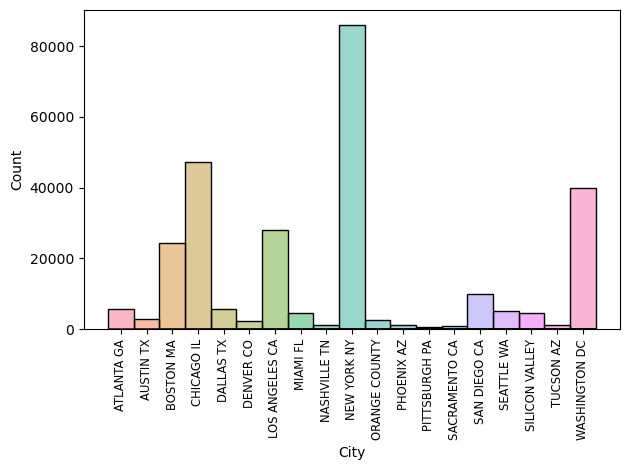

In [27]:
sns.histplot(data=df_yellow, x='City', hue='Users', legend=False)
plt.xticks(rotation=90,fontsize='small')
plt.tight_layout()
plt.show()

#### New York has higest Yellow Cab riders

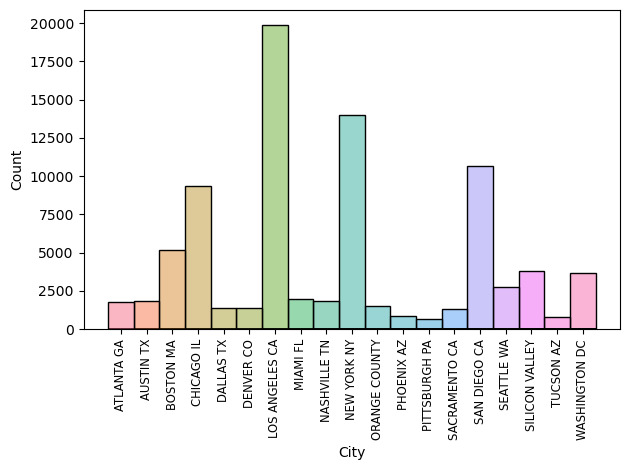

In [28]:
sns.histplot(data=df_pink, x='City', hue='Users', legend=False)
plt.xticks(rotation=90,fontsize='small')
plt.tight_layout()
plt.show()

#### Los Angeles has higest Pink Cab riders. These plot shows that how class imbalace affect the actual results. Yellow cab has much more data that Pink cab company, thus this resultant plot.

### 5. Ages of cab riders

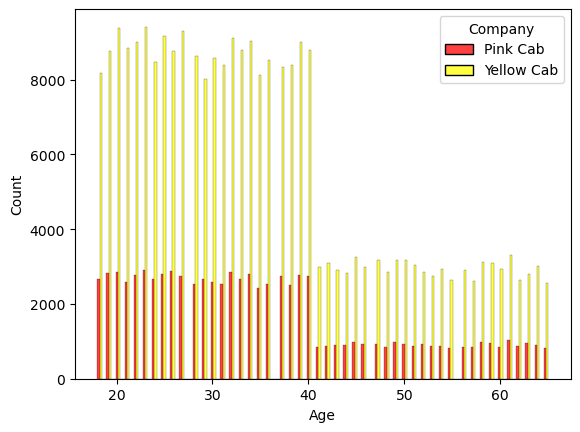

In [29]:
sns.histplot(data=df, x='Age', hue='Company',multiple='dodge', palette=['red', 'yellow'])
plt.show()

#### High frequency of users with age less than 40.